# Image Classification with OpenCV and Scikit-Learn

In this notebook, we will explore the basics of image processing using OpenCV and build a simple image classifier using Scikit-Learn. We will perform the following steps:
1. Load and preprocess images using OpenCV.
2. Extract features from the images.
3. Train a machine learning model on the extracted features.
4. Evaluate the model's performance.

## Step 1: Importing Libraries

First, we need to import the necessary libraries.


In [ ]:
# Importing necessary libraries
import cv2
import numpy as np
import os  # Import the os module
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


## Step 2: Preparing the Dataset

For this exercise, we need a dataset of images. We will create two folders: `cats` and `dogs`, each containing images of cats and dogs, respectively.

### Number of Images

To train a basic machine learning model, you should have at least 100 images in each folder (cats and dogs). However, the more images you have, the better your model is likely to perform. Ideally, aim for 500-1000 images per category for better accuracy.

### Folder Structure

The folder structure should look like this:

data/
cats/
dogs/
data/

cats/
cat1.jpg
cat2.jpg
...
dogs/
dog1.jpg
dog2.jpg

In [ ]:
# Loading the dataset
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

import zipfile

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2025-02-22 23:05:19--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.47.166.62, 2600:1408:c400:1680::317f, 2600:1408:c400:168a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.47.166.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   110MB/s    in 15s     

2025-02-22 23:05:35 (52.1 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [ ]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")



data_dir_path = 'dogs_vs_cats_zip'

There are 12500 images of dogs.
There are 12500 images of cats.



Ensure that the images are named appropriately and stored in the correct folders.


## Step 3: Loading and Preprocessing Images

We will load the images, convert them to grayscale, resize them to a uniform size, and flatten them into a 1D array to use as features for our model.



Skipping unreadable file: /tmp/PetImages/Dog/2384.jpg
Skipping unreadable file: /tmp/PetImages/Dog/8730.jpg
Skipping unreadable file: /tmp/PetImages/Dog/11675.jpg
Skipping unreadable file: /tmp/PetImages/Dog/6059.jpg
Skipping unreadable file: /tmp/PetImages/Dog/7133.jpg
Skipping unreadable file: /tmp/PetImages/Dog/5736.jpg
Skipping unreadable file: /tmp/PetImages/Dog/11849.jpg
Skipping unreadable file: /tmp/PetImages/Dog/7459.jpg
Skipping unreadable file: /tmp/PetImages/Dog/7969.jpg
Skipping unreadable file: /tmp/PetImages/Dog/6238.jpg
Skipping unreadable file: /tmp/PetImages/Dog/6718.jpg
Skipping unreadable file: /tmp/PetImages/Dog/3136.jpg
Skipping unreadable file: /tmp/PetImages/Dog/2877.jpg
Skipping unreadable file: /tmp/PetImages/Dog/3588.jpg
Skipping unreadable file: /tmp/PetImages/Dog/7369.jpg
Skipping unreadable file: /tmp/PetImages/Dog/5604.jpg
Skipping unreadable file: /tmp/PetImages/Dog/10158.jpg
Skipping unreadable file: /tmp/PetImages/Dog/10747.jpg
Skipping unreadable file

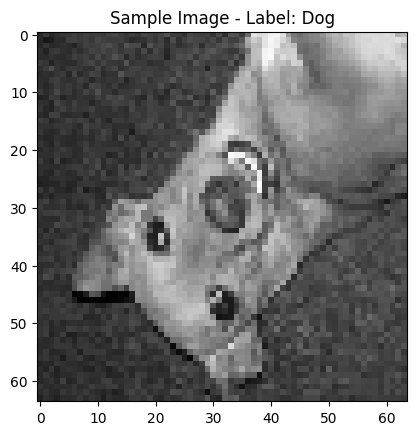

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images
def load_images(dogs_vs_cats):
    images = []  # Initialize as empty list
    labels = []  # Initialize as empty list

    for label in os.listdir(dogs_vs_cats):
        label_path = os.path.join(dogs_vs_cats, label)
        if not os.path.isdir(label_path):  # Ensure it's a directory
            continue

        if label == 'Cat': # Changed from 'cats' to 'Cat' to match folder name
            label_id = 0  # Assign 0 for cats
        elif label == 'Dog': # Changed from 'dogs' to 'Dog' to match folder name
            label_id = 1  # Assign 1 for dogs
        else:
            continue  # Ignore other folders/files

        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
                if img is None:
                    print(f"Skipping unreadable file: {img_path}")
                    continue  # Skip unreadable files

                img = cv2.resize(img, (64, 64))  # Resize to 64x64
                images.append(img.flatten())  # Flatten the image
                labels.append(label_id)  # Append label (0 or 1)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    return np.array(images), np.array(labels)

# The downloaded dataset is extracted to '/tmp/PetImages'
dogs_vs_cats = '/tmp/PetImages'  # Changed from 'data' to '/tmp/PetImages'
X, y = load_images(dogs_vs_cats)

# Display a sample image
if len(X) > 0:  # Check if images were loaded
    plt.imshow(X[0].reshape(64, 64), cmap='gray')  # Display first image
    plt.title(f"Sample Image - Label: {'Cat' if y[0] == 0 else 'Dog'}")
    plt.show()
else:
    print("No images were loaded. Check the dataset path and structure.")

## Step 4: Splitting the Data

We will split the data into training and testing sets using the `train_test_split` function from Scikit-Learn.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (19956, 4096)
Testing set size: (4990, 4096)


## Step 3: Training a Machine Learning Model

### What is SVM (Support Vector Machine)?

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression tasks. However, it is mostly used for classification problems. The objective of the SVM algorithm is to find a hyperplane in an N-dimensional space (N is the number of features) that distinctly classifies the data points.

### Key Concepts:

- **Hyperplane:** A decision boundary that separates different classes in the feature space. In 2D, it's a line; in 3D, it's a plane.
- **Support Vectors:** Data points that are closest to the hyperplane and influence its position and orientation. These points help in maximizing the margin of the classifier.
- **Margin:** The distance between the hyperplane and the closest data points from either class. SVM aims to maximize this margin.

### Why Use SVM?

- **Effective in high-dimensional spaces:** SVM is very effective when the number of features is large.
- **Memory efficient:** It uses a subset of training points (support vectors) in the decision function, making it memory efficient.
- **Versatile:** Different kernel functions can be specified for the decision function. Common kernels include linear, polynomial, and radial basis function (RBF).

### What does `SVC(kernel='linear')` mean?

`SVC` stands for Support Vector Classification, which is a class in the Scikit-Learn library used to implement the SVM algorithm for classification tasks. The `kernel` parameter in the `SVC` class specifies the type of hyperplane used to separate the data.

#### Kernel Types:

- **Linear Kernel:** The data is linearly separable (i.e., a straight line or hyperplane can separate the data). This is the simplest kernel.
  - When we use `SVC(kernel='linear')`, it means we are using a linear kernel for our SVM. This kernel is appropriate when the data can be separated by a straight line (or hyperplane in higher dimensions).
- **Polynomial Kernel:** The data is not linearly separable, but a polynomial function of the input features can separate the data.
- **Radial Basis Function (RBF) Kernel:** The data is not linearly separable, but mapping the data into a higher-dimensional space using a Gaussian (RBF) function can separate the data.

### Training the SVM Model

We will use a Support Vector Machine (SVM) classifier from Scikit-Learn to train our model on the extracted features.


In [ ]:
# Train an SVM classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


## Step 6: Conclusion

In this notebook, we:
1. Loaded and preprocessed images using OpenCV.
2. Extracted features by flattening the grayscale images.
3. Trained an SVM classifier on the extracted features.
4. Evaluated the model's performance.

This is a basic introduction to image classification using classical machine learning techniques. For more advanced applications, consider exploring deep learning models like Convolutional Neural Networks (CNNs) using libraries such as TensorFlow or PyTorch.

